___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>RNN PROJECT<br><br>Product Amount Forecast by Time<br><h1>

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib notebook

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

## Indest Data

In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df
# there are production values between the years 1972 and 2019 with monthly frequencies

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [4]:
df.rename(columns={'IPN31152N': 'Production'}, inplace=True)
# df.columns = ['Production']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [6]:
df.describe()

,Production
count,573.000
mean,109.896
std,27.951
min,58.660
25%,88.936
50%,107.643
75%,128.278
max,196.174


In [7]:
df.shape, df.size

((573, 1), 573)

In [8]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='DATE'>

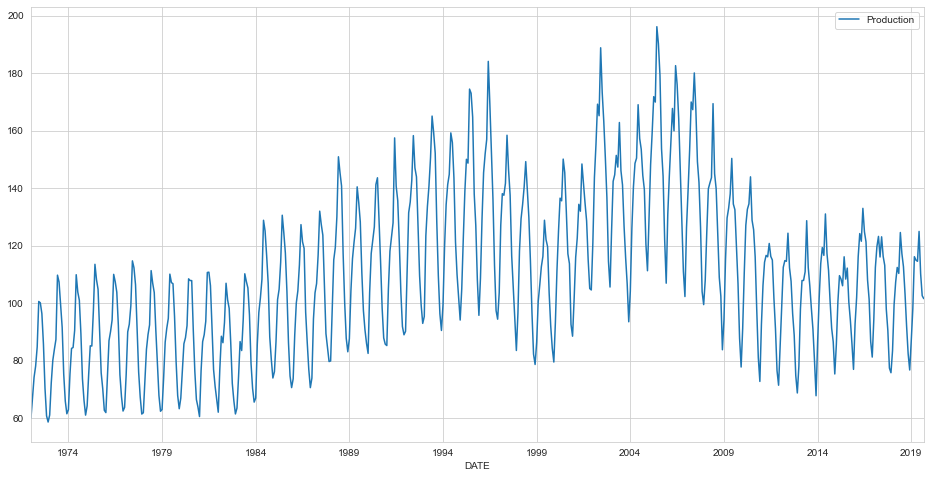

In [9]:
df.plot(figsize=(16,8))

In [ ]:
# A period appears to be complete after 12 months (one year) have passed

## Preprocessing of Data

### Train Test Split

In [10]:
len(df)

573

In [11]:
test_size=24  # test size value must be greater than period's
test_index=len(df)- test_size
test_index

549

In [12]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [13]:
len(train), len(test)

(549, 24)

In [14]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [15]:
test

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [18]:
print('train_scaled shape:', train_scaled.shape)
print('test_scaled shape:', test_scaled.shape)

train_scaled shape: (549, 1)
test_scaled shape: (24, 1)


In [19]:
train.min(), train.idxmin()  # 0

(Production   58.660
 dtype: float64,
 Production   1972-12-01
 dtype: datetime64[ns])

In [20]:
train.max(), train.idxmax()  # 1

(Production   196.174
 dtype: float64,
 Production   2005-06-01
 dtype: datetime64[ns])

## Time Series Generator

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
length = 12  # monthly frequencies (one completed period corresponds to 12 months)
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)

In [23]:
len(generator)

537

In [24]:
generator[0] # sample

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [25]:
train_scaled[12]

array([0.01774221])

In [26]:
generator[1] # sample

(array([[[0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221]]]),
 array([[0.09850931]]))

In [27]:
train_scaled[13]

array([0.09850931])

In [28]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modeling & Model Performance

### Import related libraries

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
print(tf.__version__)

<IPython.core.display.Javascript object>

2.8.0


### Creating Model

### with "tanh" activation function

In [31]:
n_features = train_scaled.shape[1]  # 1 (there is one feature)

In [32]:
model = Sequential()

model.add(LSTM(100, activation = 'tanh', input_shape=(length, n_features)))
# default activation function is 'tanh' for LSTM
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=5) # restore_best_weights=True

In [34]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)
len(validation_generator)

12

In [35]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 7s 8ms/step - loss: 0.0199 - val_loss: 0.0069
Epoch 2/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0053 - val_loss: 0.0027
Epoch 3/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 4/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 5/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 6/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 7/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 8/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0033 - val_loss: 0.0020


<AxesSubplot:>

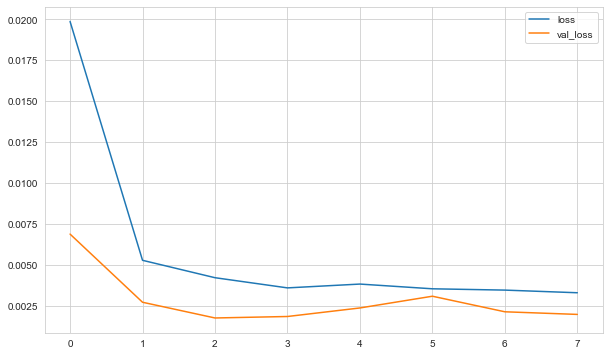

In [36]:
losses_df = pd.DataFrame(model.history.history)
losses_df.plot()

#### Evaluate on Test Data

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [38]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [39]:
predictions_scaled

[array([0.25995842], dtype=float32),
 array([0.2550112], dtype=float32),
 array([0.28708297], dtype=float32),
 array([0.33540714], dtype=float32),
 array([0.38205713], dtype=float32),
 array([0.4187985], dtype=float32),
 array([0.4412945], dtype=float32),
 array([0.44580877], dtype=float32),
 array([0.430911], dtype=float32),
 array([0.39576602], dtype=float32),
 array([0.35169405], dtype=float32),
 array([0.3135603], dtype=float32),
 array([0.29785192], dtype=float32),
 array([0.3061586], dtype=float32),
 array([0.33256978], dtype=float32),
 array([0.3665113], dtype=float32),
 array([0.3986568], dtype=float32),
 array([0.4224093], dtype=float32),
 array([0.4334272], dtype=float32),
 array([0.42938638], dtype=float32),
 array([0.4108507], dtype=float32),
 array([0.38264334], dtype=float32),
 array([0.3538686], dtype=float32),
 array([0.33459002], dtype=float32)]

In [40]:
test_scaled

array([[0.23134679],
       [0.13655347],
       [0.12472921],
       [0.18015997],
       [0.29691617],
       [0.35382169],
       [0.39102302],
       [0.37592272],
       [0.47940099],
       [0.42586022],
       [0.3928192 ],
       [0.32470899],
       [0.2434103 ],
       [0.17289089],
       [0.13163033],
       [0.20608099],
       [0.28689318],
       [0.41822681],
       [0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

In [41]:
eval_metrics(test_scaled, predictions_scaled)  # with scaled data

r2_score: 0.3003493179601785 
mae: 0.07137539794631405 
mse: 0.008188481233892944 
rmse: 0.09049022728390588


### with "tanh" activation function - 2

In [42]:
model = Sequential()

model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape=(length, n_features)))
model.add(LSTM(50, activation = 'tanh')) # default activation function is 'tanh' for LSTM
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_2 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 12s 14ms/step - loss: 0.0200 - val_loss: 0.0030
Epoch 2/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0053 - val_loss: 0.0027
Epoch 3/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0050 - val_loss: 0.0026
Epoch 4/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 5/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0039 - val_loss: 0.0021
Epoch 6/20
537/537 [==============================] - 7s 12ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 7/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 8/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 9/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 10/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0030 - val_l

<AxesSubplot:>

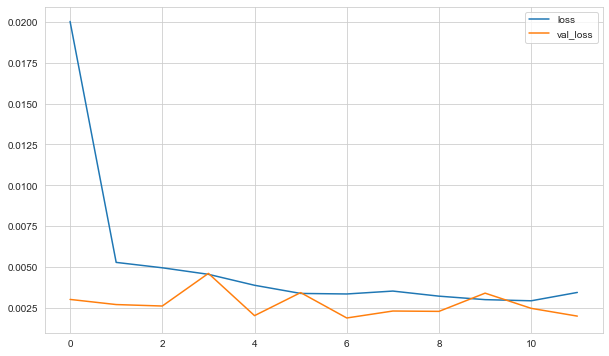

In [44]:
losses_df = pd.DataFrame(model.history.history)
losses_df.plot()

#### Evaluate on Test Data

In [45]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [46]:
eval_metrics(test_scaled, predictions_scaled)  # with scaled data

r2_score: 0.848518345735966 
mae: 0.03523890114197113 
mse: 0.0017728914086151098 
rmse: 0.042105717053805294


#### Inverse Transformations and Comparing

In [47]:
predictions = scaler.inverse_transform(predictions_scaled)  # unscale

In [48]:
compare = test

In [49]:
compare['Predictions_Tanh'] = predictions
compare

,Production,Predictions_Tanh
DATE,,
2017-10-01,90.473,88.983
2017-11-01,77.438,84.319
2017-12-01,75.812,86.885
2018-01-01,83.434,94.770
2018-02-01,99.490,103.545
2018-03-01,107.315,110.926
2018-04-01,112.431,116.662
2018-05-01,110.354,120.281
2018-06-01,124.584,121.214


<AxesSubplot:xlabel='DATE'>

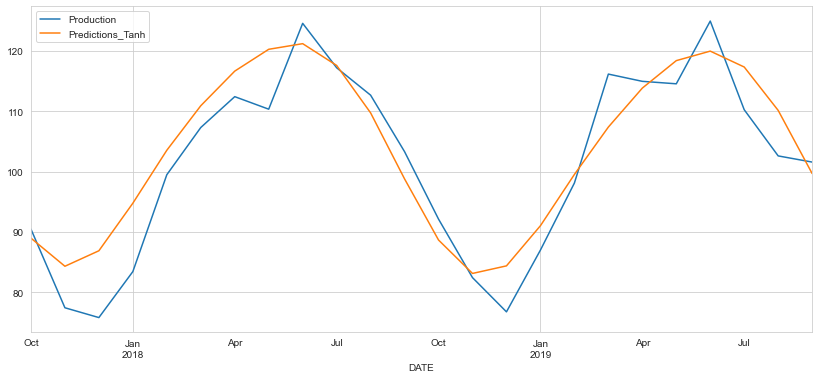

In [50]:
compare.plot(figsize = (14, 6))  # prediction for 24 months 

#### Calculation R2 Score and Error Metrics

In [51]:
eval_metrics(compare.Production, compare.Predictions_Tanh)   # with unscaled data

r2_score: 0.8485183457359663 
mae: 4.8458387277469 
mse: 33.52550541407915 
rmse: 5.790121364365271


### with "relu" activation function

In [52]:
model = Sequential()

model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape=(length, n_features)))
model.add(LSTM(50, activation = 'relu')) # default activation function is 'tanh' for LSTM
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 9s 11ms/step - loss: 0.0268 - val_loss: 0.0082
Epoch 2/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0101 - val_loss: 0.0038
Epoch 3/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0070 - val_loss: 0.0015
Epoch 4/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0071 - val_loss: 0.0091
Epoch 5/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0062 - val_loss: 0.0023
Epoch 6/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0052 - val_loss: 0.0023
Epoch 7/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 8/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0049 - val_loss: 0.0033


<AxesSubplot:>

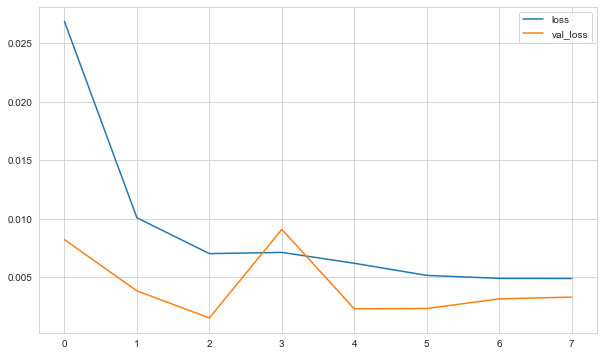

In [54]:
losses_df = pd.DataFrame(model.history.history)
losses_df.plot()

#### Evaluate on Test Data

In [55]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [56]:
predictions_scaled

[array([0.23108736], dtype=float32),
 array([0.15528773], dtype=float32),
 array([0.14628217], dtype=float32),
 array([0.23330447], dtype=float32),
 array([0.31530446], dtype=float32),
 array([0.36580825], dtype=float32),
 array([0.38490465], dtype=float32),
 array([0.4019703], dtype=float32),
 array([0.41195807], dtype=float32),
 array([0.3872333], dtype=float32),
 array([0.3332559], dtype=float32),
 array([0.23763207], dtype=float32),
 array([0.16762495], dtype=float32),
 array([0.10495585], dtype=float32),
 array([0.11098033], dtype=float32),
 array([0.18167053], dtype=float32),
 array([0.24999782], dtype=float32),
 array([0.299522], dtype=float32),
 array([0.3353111], dtype=float32),
 array([0.36361152], dtype=float32),
 array([0.37167096], dtype=float32),
 array([0.3476726], dtype=float32),
 array([0.28999034], dtype=float32),
 array([0.19282767], dtype=float32)]

In [57]:
test_scaled

array([[0.23134679],
       [0.13655347],
       [0.12472921],
       [0.18015997],
       [0.29691617],
       [0.35382169],
       [0.39102302],
       [0.37592272],
       [0.47940099],
       [0.42586022],
       [0.3928192 ],
       [0.32470899],
       [0.2434103 ],
       [0.17289089],
       [0.13163033],
       [0.20608099],
       [0.28689318],
       [0.41822681],
       [0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

In [58]:
eval_metrics(test_scaled, predictions_scaled)  # with scaled data

r2_score: 0.7000015458453064 
mae: 0.04822496848728123 
mse: 0.003511083137774722 
rmse: 0.059254393404833045


#### Inverse Transformations and Comparing

In [59]:
predictions = scaler.inverse_transform(predictions_scaled)  # unscale

In [60]:
compare['Predictions_Relu'] = predictions
compare

,Production,Predictions_Tanh,Predictions_Relu
DATE,,,
2017-10-01,90.473,88.983,90.438
2017-11-01,77.438,84.319,80.014
2017-12-01,75.812,86.885,78.776
2018-01-01,83.434,94.770,90.742
2018-02-01,99.490,103.545,102.019
2018-03-01,107.315,110.926,108.964
2018-04-01,112.431,116.662,111.590
2018-05-01,110.354,120.281,113.936
2018-06-01,124.584,121.214,115.310


<AxesSubplot:xlabel='DATE'>

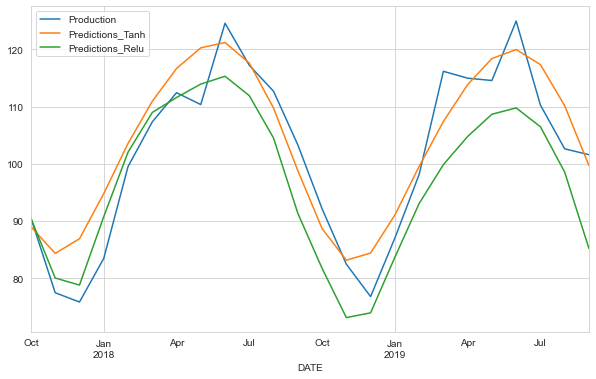

In [61]:
compare.plot()  # prediction for 24 months

#### Calculation R2 Score and Error Metrics

In [62]:
eval_metrics(compare.Production, compare.Predictions_Relu)   # with unscaled data

r2_score: 0.7000015458453062 
mae: 6.631603494063147 
mse: 66.39483736722396 
rmse: 8.148302729232878


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [63]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [64]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [65]:
len(df), len(generator)

(573, 561)

In [66]:
model = Sequential()

model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape=(length, n_features)))
model.add(LSTM(50, activation = 'tanh'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=20)

Epoch 1/20
561/561 [==============================] - 11s 12ms/step - loss: 0.0205
Epoch 2/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0053
Epoch 3/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0047
Epoch 4/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0039
Epoch 5/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0039
Epoch 6/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0037
Epoch 7/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0035
Epoch 8/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0033
Epoch 9/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0034
Epoch 10/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0032
Epoch 11/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0032
Epoch 12/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0027
Epoch 13/20


In [67]:
scaled_full_data.shape

(573, 1)

In [68]:
scaled_full_data[-length:].shape

(12, 1)

In [69]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [70]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 85.45132173],
       [ 74.71664331],
       [ 71.95981383],
       [ 78.23142674],
       [ 88.91770195],
       [ 96.23180712],
       [100.4330662 ],
       [105.96355455],
       [110.94543696],
       [108.96428937],
       [101.39292168],
       [ 90.11672215]])

In [71]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [72]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
# MS ===> month start frequency

In [73]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [74]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,85.451
2019-11-01,74.717
2019-12-01,71.960
2020-01-01,78.231
2020-02-01,88.918
2020-03-01,96.232
2020-04-01,100.433
2020-05-01,105.964
2020-06-01,110.945
2020-07-01,108.964


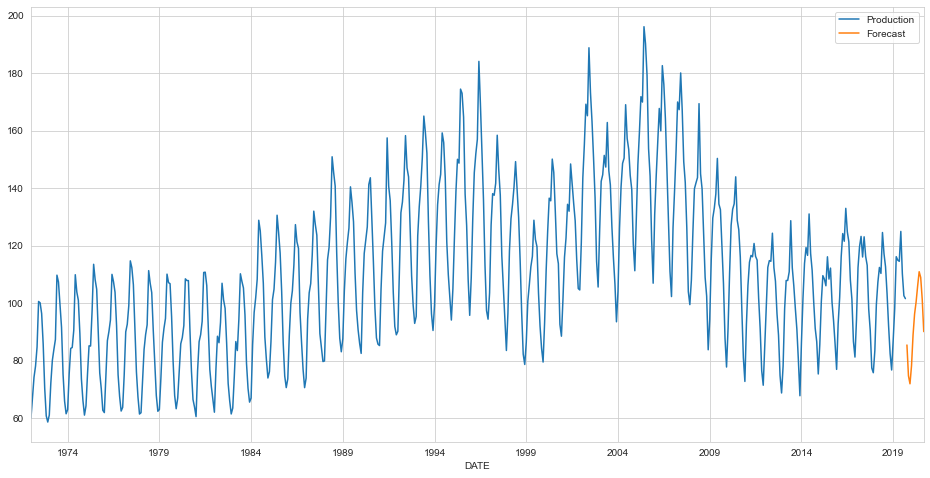

In [75]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(16, 8));

(576.0, 611.0)

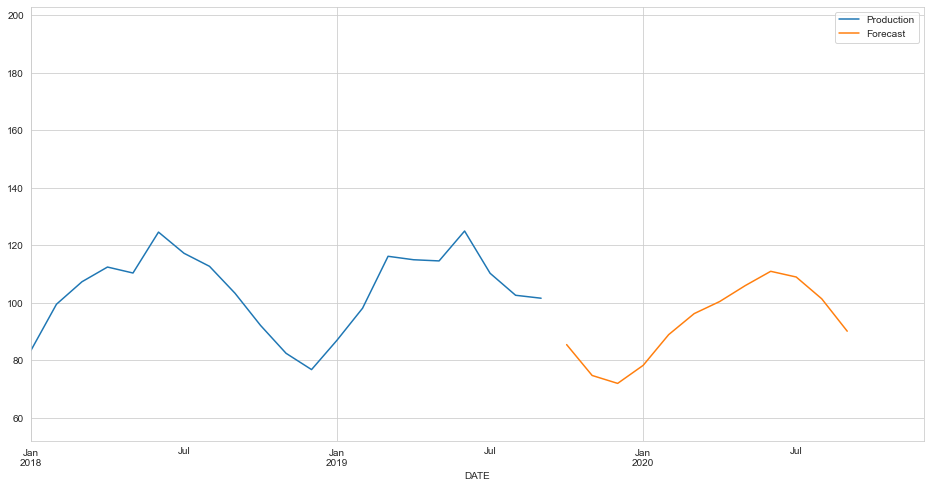

In [76]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(16, 8))
plt.xlim('2018-01-01', '2020-12-01')